In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'D:Downloads/iiot_30min_norm.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

print("Missing Values per Column before Imputation:")
print(df.isnull().sum())

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Step 2: Encode Categorical Variables

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 3: Feature Scaling

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 4: Split the Data into Training and Testing Sets

# Assuming the last column is the target variable, adjust accordingly if different
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
print("\nShape of Training Data:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nShape of Testing Data:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Optionally, save the preprocessed data to new CSV files
X_train.to_csv('X_train_preprocessed.csv', index=False)
X_test.to_csv('X_test_preprocessed.csv', index=False)
y_train.to_csv('y_train_preprocessed.csv', index=False)
y_test.to_csv('y_test_preprocessed.csv', index=False)


Missing Values per Column before Imputation:
TIME     0
FM1      0
PE1      0
PE2      0
PE3      0
PE4      0
TP1      0
TP2      0
EPOCH    0
dtype: int64

Shape of Training Data:
X_train: (576, 8), y_train: (576,)

Shape of Testing Data:
X_test: (144, 8), y_test: (144,)


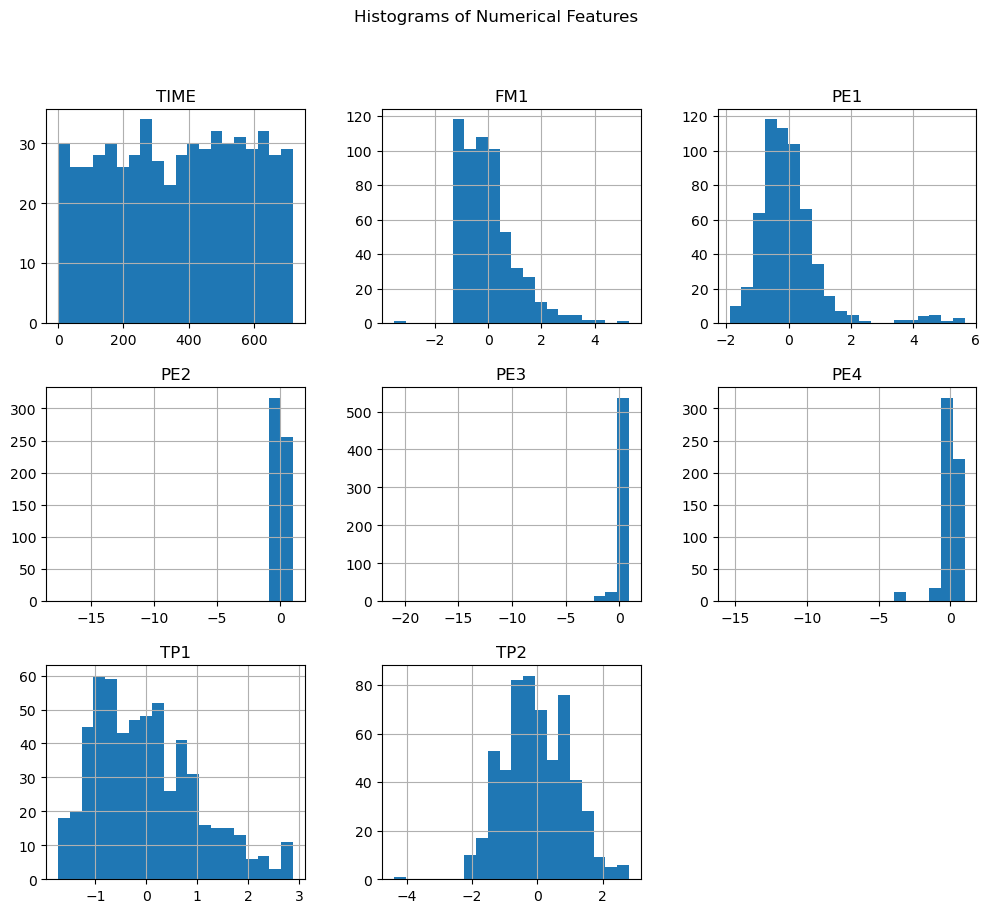

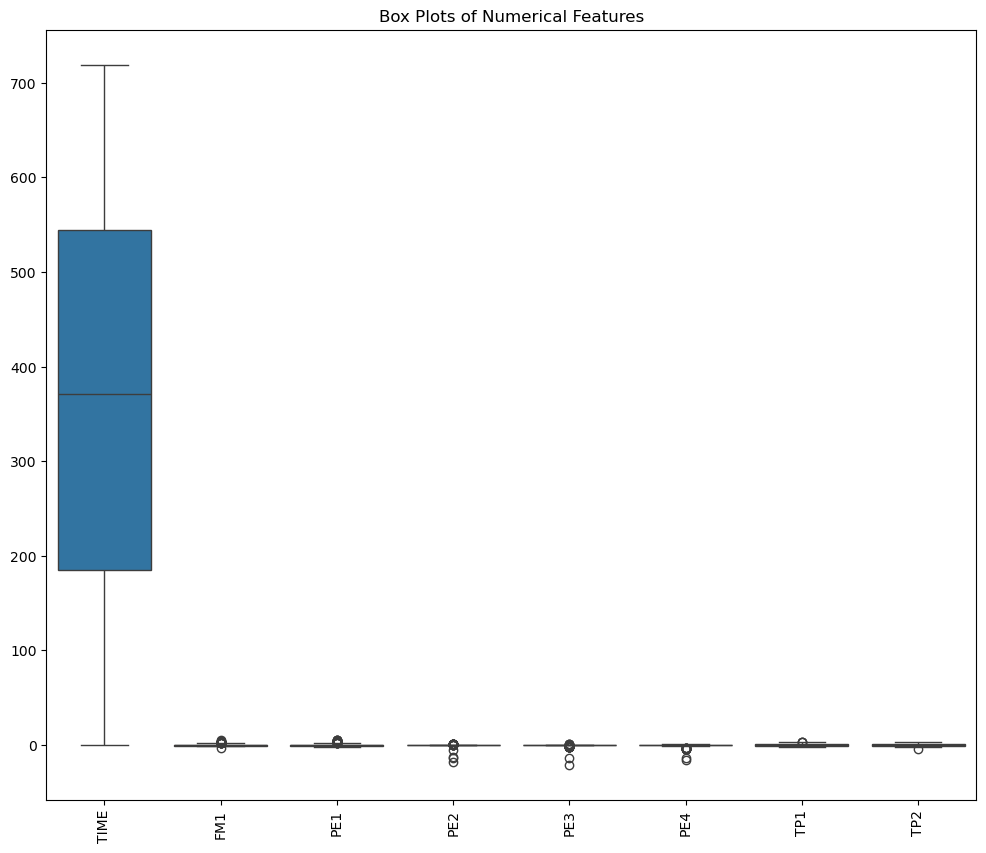

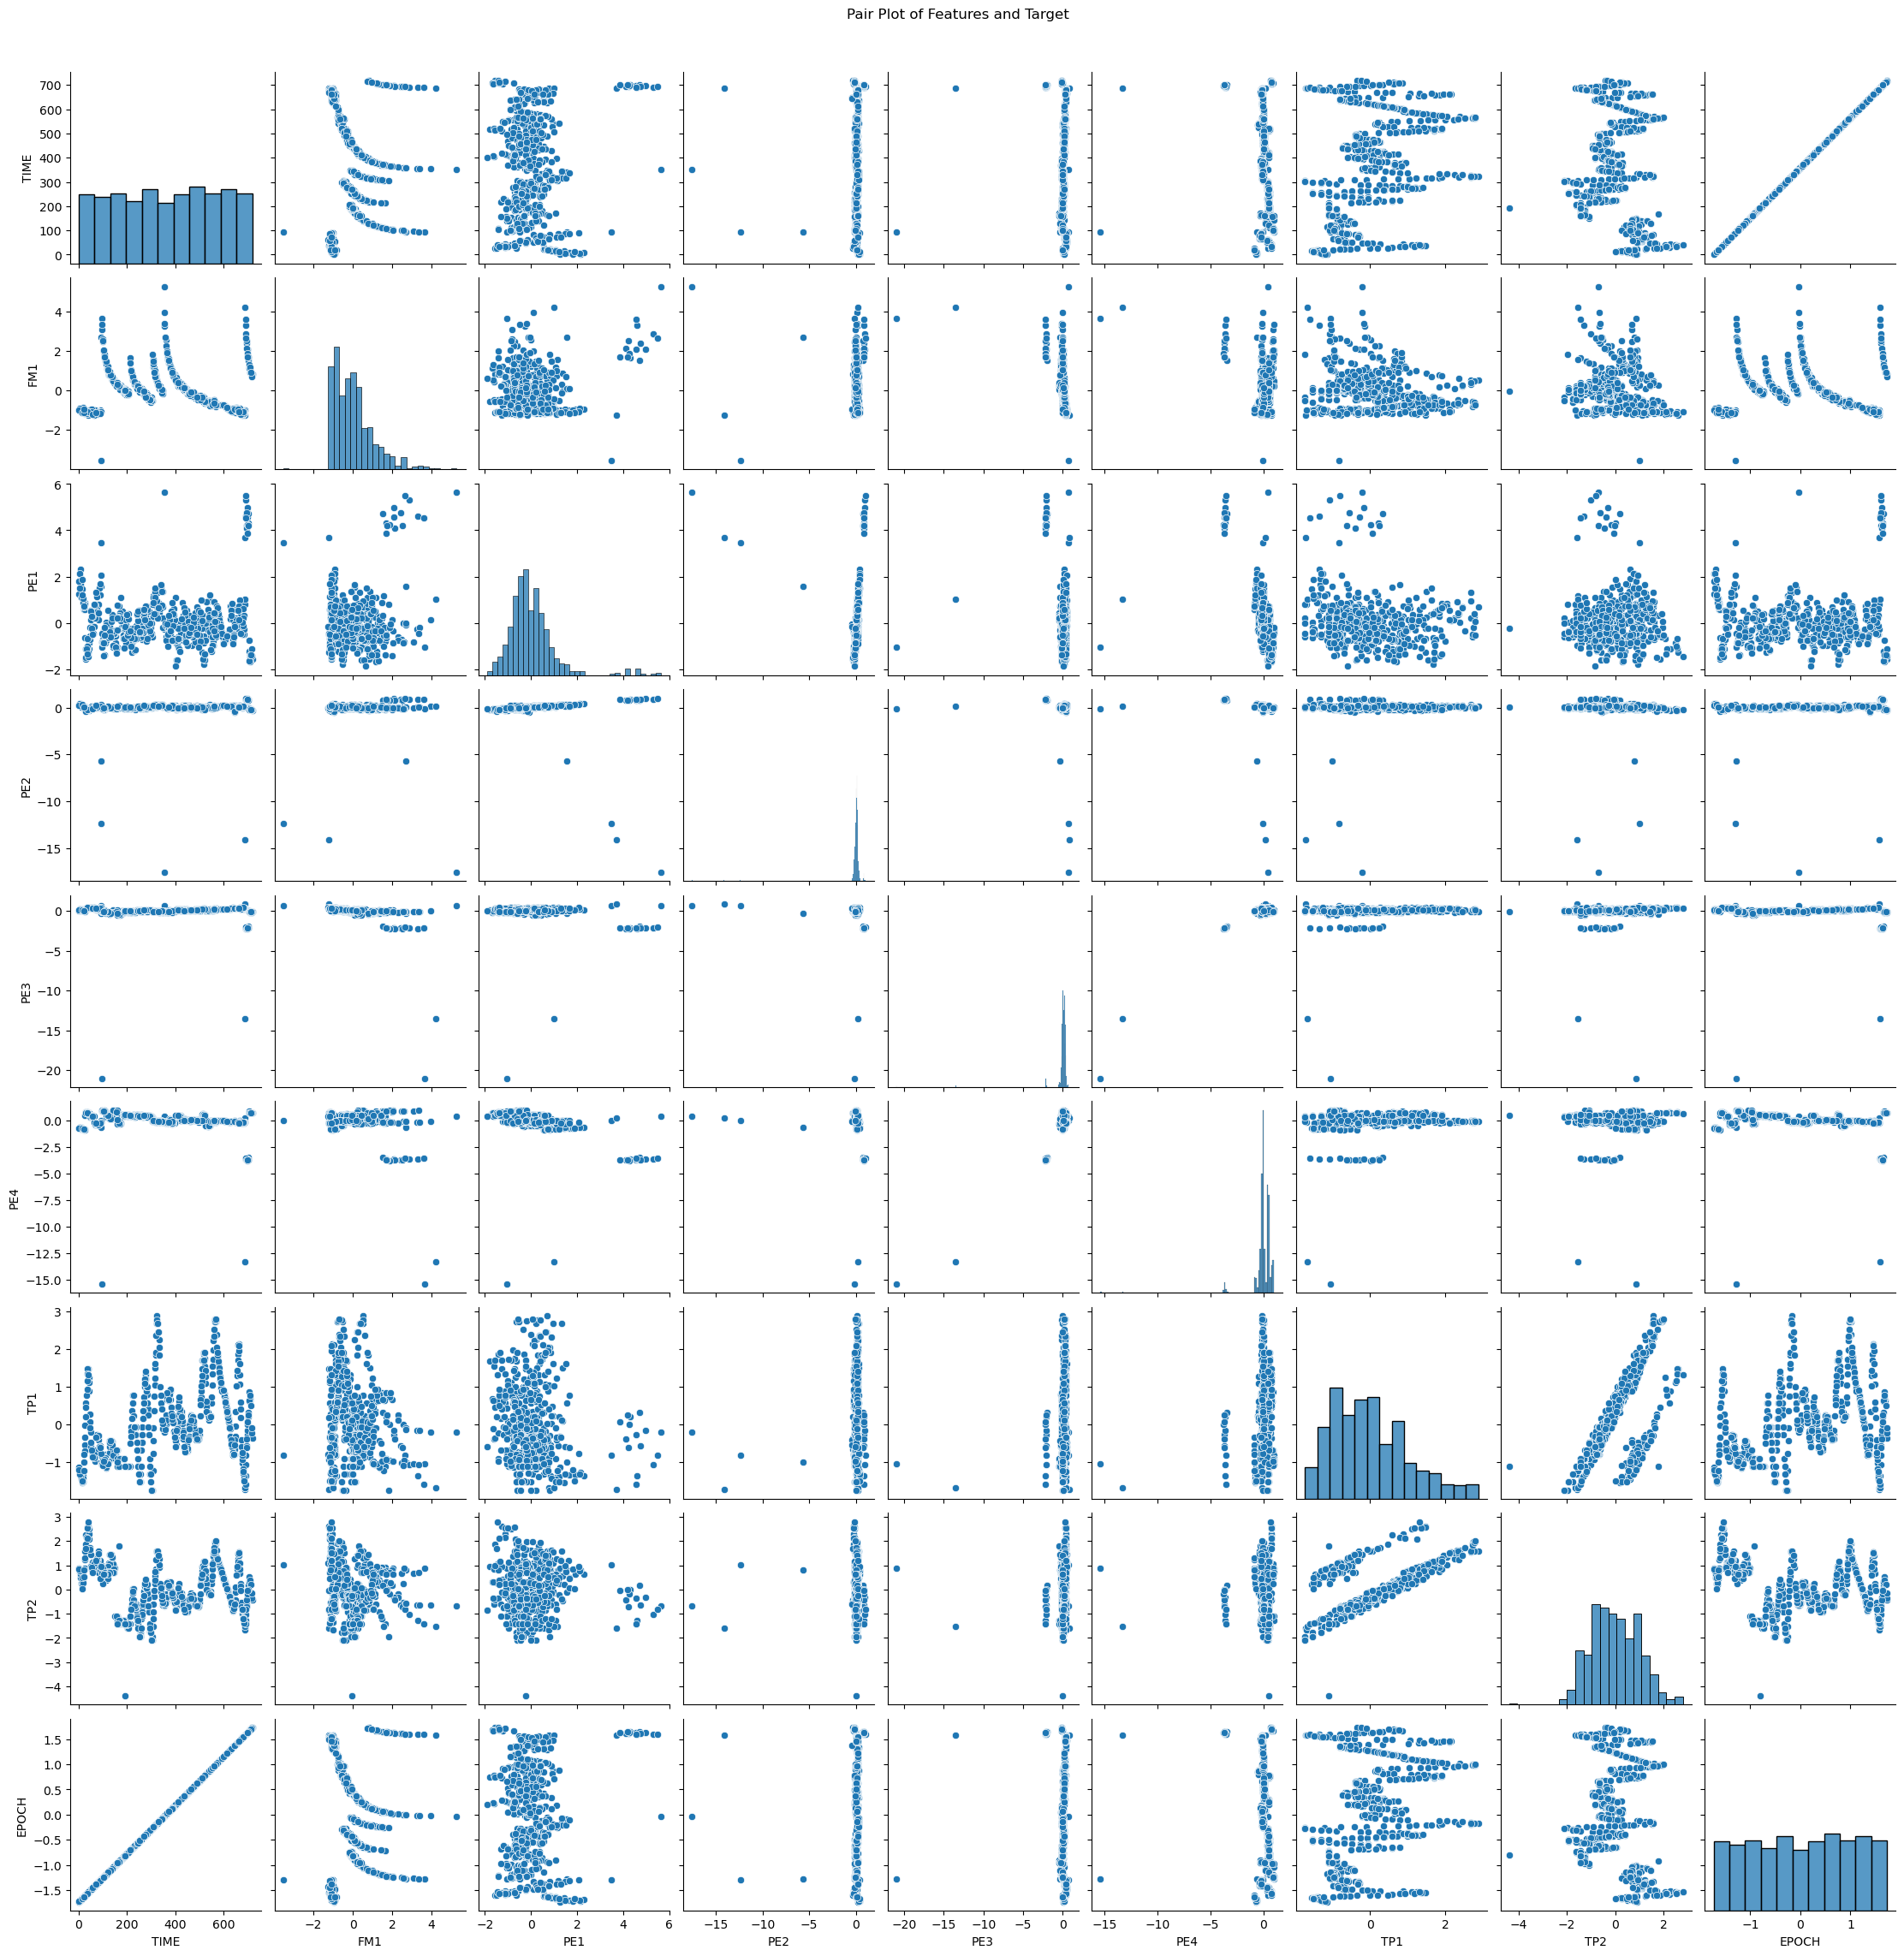

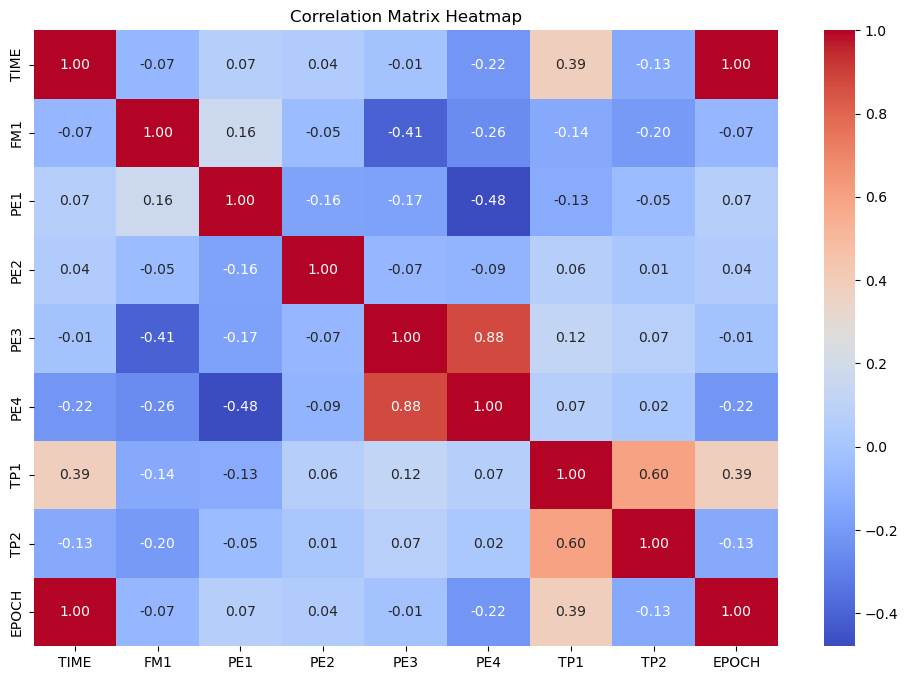

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
X_train = pd.read_csv('X_train_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')

# Combine features and target for easier visualization
df_train = pd.concat([X_train, y_train], axis=1)

# Step 1: Visualize the Distribution of Each Feature

# Histograms
X_train.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=X_train)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

# Step 2: Visualize Relationships Between Features and the Target Variable

# Pair plot to visualize pairwise relationships between features and the target variable
sns.pairplot(df_train)
plt.suptitle('Pair Plot of Features and Target', y=1.02)
plt.show()

# Step 3: Visualize the Correlation Matrix

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
